# generalized linear models (GLM)

- For discrete response, we can use regression model from generalized linear model, which is built from **exponential families**

- model choice depends on the type of discrete response

    - Binary response: logistic model, Probit model

    - Nomial response: Multinomial Logit Model

    - Count response: Possion model, Negative Binomial model

- model choice determines how we calculate **conditional probability function**

[Statsmodel: Regression with discrete dependent variable](https://www.statsmodels.org/stable/discretemod.html) lists all the model choices

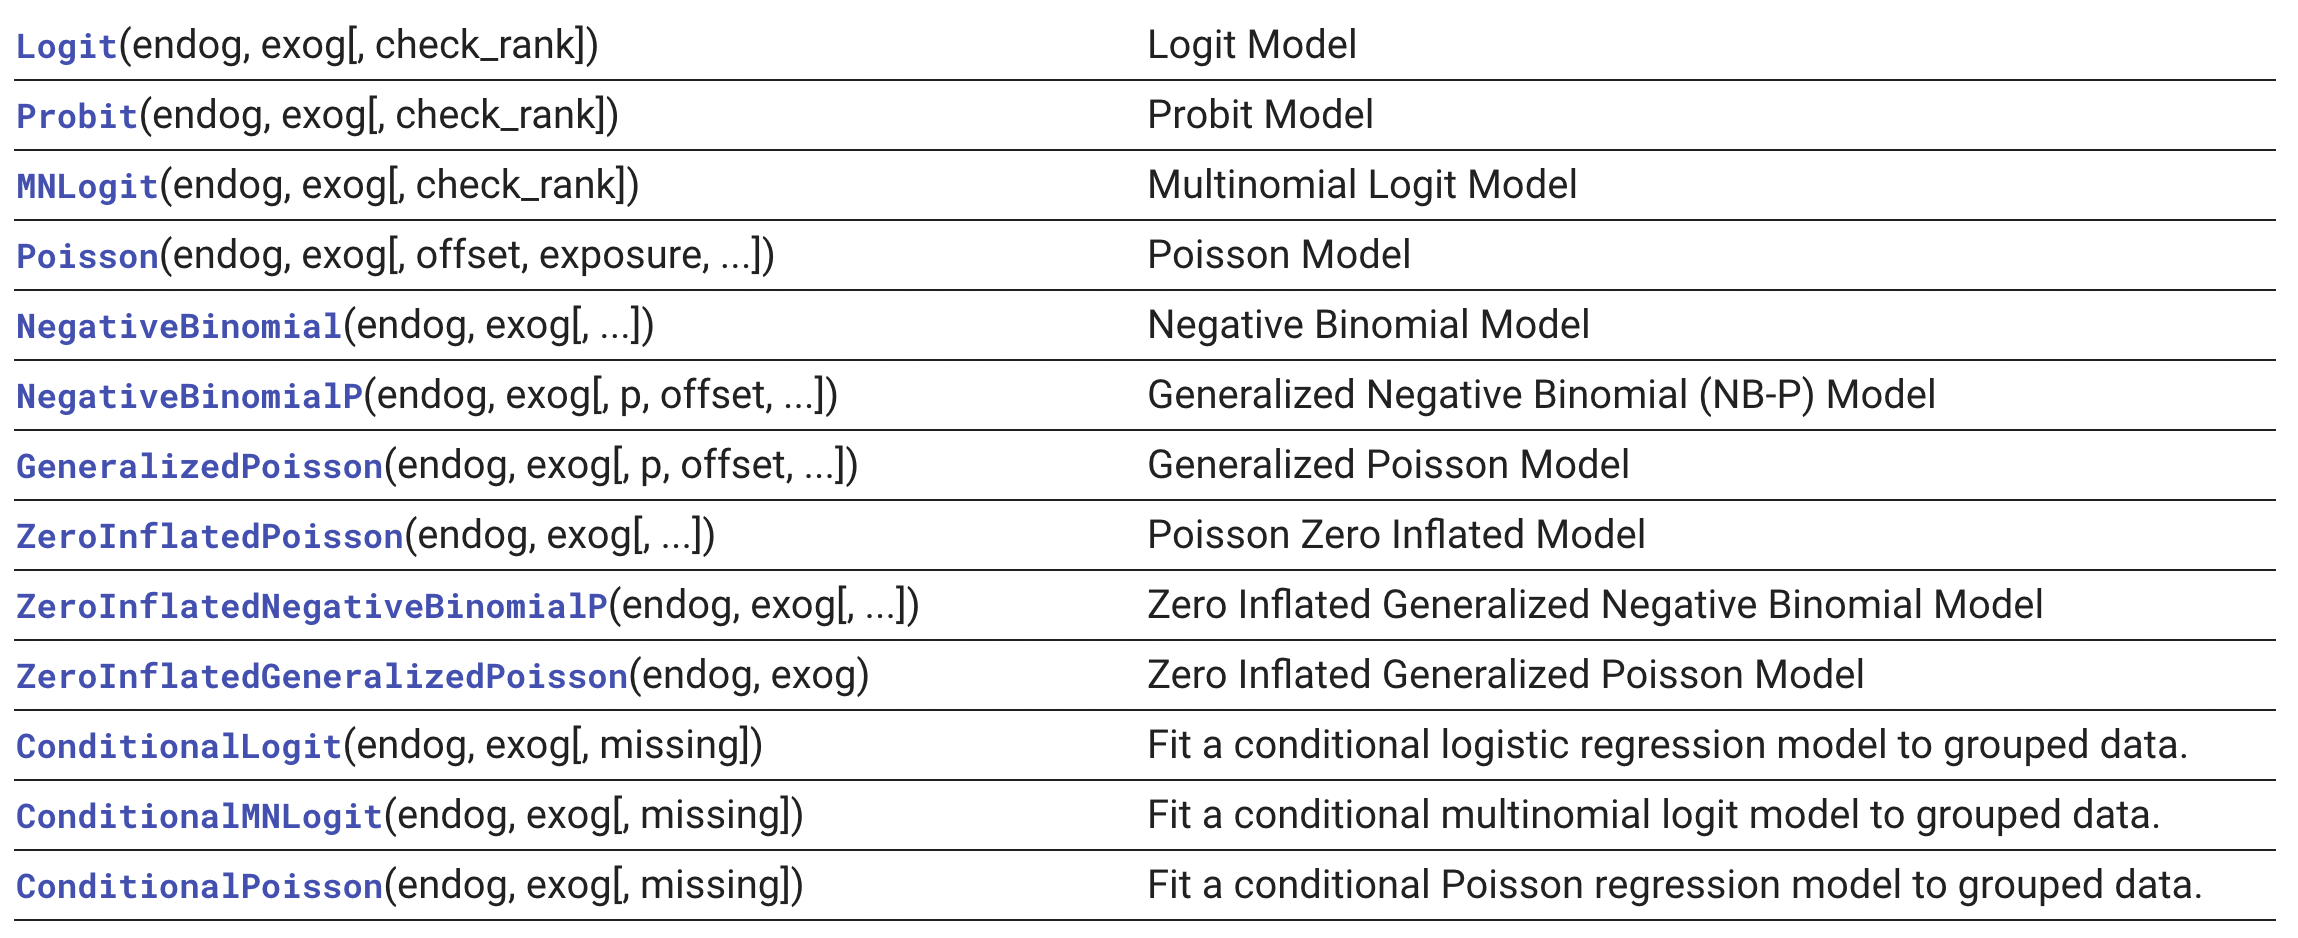

## why we use GLM?

- solve for common properties of different models

- learn sth new about those models from GLM framework

- abstract remove complexity from specific problems

- e.g., for optimization, dealing with convex function is easier than directly dealing with logistic functions

## definition

construct GLM from exponential families

The probability of $y$ **given parameters** $\gamma,x,\beta$ is:

$$
p(\mathbf{y}\ ;\gamma,\mathbf{x},\beta)=h(\mathbf{y})\exp\left [ \sum_{i=1}^{s}\gamma_i[T(\mathbf{y})]_i-A(\gamma) \right ]=h(\mathbf{y})\exp\left[\left \langle \gamma,T(\mathbf{\mathbf{y}}) \right \rangle-A(\gamma)\right]
$$

- in general case, 

    $\gamma \in \mathbb{R}^s$, $\mathbf{y} \in \mathbb{R}^n$,  $\mathbf{x} \in \mathbb{R}^d$, $\beta \in \mathbb{R}^d$ are all vectors
    
    function $h(\mathbf{y} ): \mathbb{R}^n\mapsto\mathbb{R}$
    
    function $T(\mathbf{y} ): \mathbb{R}^n\mapsto\mathbb{R}^s$
    
    function $A(\gamma): \mathbb{R}^s\mapsto\mathbb{R}$


**2 properties**


- $\mathbb{E}[T(\mathbf{y} )|x]=\nabla A(\gamma)$
    
    
- $Cov[T(\mathbf{y} )|x]=\mathbb{H}[A(\gamma)]$
    
covariance of $T(\mathbf{y} )$ equals to Hessian of $A(\gamma)$, 

which means $A(\gamma)$ is a **convex function, good for optimization**

## Simple case $\gamma=\beta^T\mathbf{x}$

- **key point**: statistics are driven by $\beta^T\mathbf{x}$

    where $w$ follows an appropriate distribution. 

$$Y = \beta^T\mathbf{x} + w$$



- in simple case, we take $s=1$, then $\gamma$ and $y$ are both scalars

- **2 properties** reduces to

   - $\mathbb{E}[T(y)|x]=A'(\gamma)$  one-order derivative at $\gamma$
         
   - $Cov[T(y)|x]=A''(\gamma)$  two-order derivative at $\gamma$



our **modeling choice** is scalar $\gamma = \beta^T\mathbf{x}=\left \langle x, \beta \right \rangle$,

so now $\gamma$ depends on $x$ and $\beta$


usually take $T(y)=y$

then

$$
p(y\ ;x,\beta)=h(y)\exp\left [ \sum_{i=1}^{s} y_i x_i^T\beta-A(\left \langle  x_i,\beta \right \rangle) \right ]=h(y)\exp \left[y \left \langle x,\beta \right \rangle -A(\left \langle x,\beta \right \rangle)\right]
$$

property: 

   $${A}'(\beta^T\mathbf{x})=\mathbb{E}[T(y)|x]$$

the derivative of $A(\beta^T\mathbf{x})$ equals to expectation of $T(y)$ given $x$

empirical risk function

$$
f(\beta)=\frac{1}{n}\sum_{i=1}^n\left[A(\left \langle x_i,\beta \right \rangle)-y_i\left \langle x_i,\beta \right \rangle-log(h(y_i))\right]
$$

gradient

$$
\nabla f(\beta)=\frac{1}{n}\sum_{i=1}^n x_i \left(A'(\left \langle x_i,\beta \right \rangle)-y_i\right)=\frac{1}{n}X^T e
$$

Hassian

$$
H(f\beta)=\frac{1}{n}A''(\left \langle x,\beta \right \rangle)X\beta X^TX=\frac{1}{n}\sum_{i=1}^nA''(\left \langle x_i,\beta \right \rangle)\ x_i x_i^T
$$

vector $e \in \mathbb{R}^n$ is a sort of error

$$
e=A'(\left \langle x,\beta \right \rangle)-y
$$

error of $i$ th observation is 

$$
e_i=A'(\left \langle x_i,\beta \right \rangle)-y_i
$$

## special cases of $\gamma=\beta^T\mathbf{x}$

- linear regression with Normal distribution

$$\mathbb{E}[T(y)|x]=\gamma$$

$$
A(\gamma)=\frac{1}{2}\gamma ^2=A(\beta^T\mathbf{x})
$$

$$
A'(\gamma)=\gamma=\left \langle x,\beta \right \rangle
$$


Given pdf of normal distribution

$$
\mathbb{P}_{\beta }(y|x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}exp\left ( -\frac{(\beta^T\mathbf{x}-y)^2}{2\sigma^2} \right )
$$

rewrite it as:

$$
\mathbb{P}_{\beta }(y|x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp \left ( -\frac{y^2}{2\sigma^2} \right ) \exp\left ( \frac{y}{\sigma^2}(\beta^T\mathbf{x}) -\frac{(\beta^T\mathbf{x})^2}{2\sigma^2}\right )
$$


- logistic regression with Bernoulli distribution

$$\mathbb{E}[T(y)|x]=\text{sigmoid}(\beta^T\mathbf{x})$$

$$
A(\gamma)=\ln[1+\exp(\gamma)]
$$

derivative is sigmoid function

$$
A'(\gamma)=\frac{1}{1+exp(-\gamma)}=p=\mathbb{P}(y=1|x)
$$

- counts with Poisson distribution

    counts: arrivals, phone calls into call center

## Logistic regression: sigmoid function

- model: $$\text{logit}(p) = \beta^T\mathbf{x} + w$$

- Assumptions:

    1. data are i.i.d

    2. $Y \sim \text{Bernoulli}(p)$ 

- Assume label $\mathcal{Y} \in \left\{0, +1 \right\}$, conditional probability of $y$ given $x$ is

$$
\mathbb{P}(y|x,\beta)=\left\{\begin{matrix}
p & y=1\\ 
1-p &y=0 
\end{matrix}\right.
$$

- Logistic regression use **sigmoid function** $f(s)$  to estimate conditional probability $P(y=1 | x)$

$$
f(s)=\frac{1}{1+\exp(-s)}=\frac{\exp(s)}{1+\exp(s)}
$$

- let $s = \beta^T\mathbf{x}$, then

$$
P(y=1 | x) = p=f(\beta^T\mathbf{x})=\frac{\exp(\beta^T\mathbf{x})}{1+\exp(\beta^T\mathbf{x})}
$$

- $f(s)$ is not necessarily a good calibration of $P(y=1 | x)$, i.e., a good estimate for $P(y=1 | x)$

## linear regression: pdf of Normal distribution

- model:  $w \sim N(0,\sigma^2)\ \text{and}\ i.i.d.$

$$Y = \beta^T\mathbf{x} + w$$

- linear regression use **pdf of normal distribution** to estimate conditional probability

$$
\mathbb{P}_{\beta }(y|x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left ( -\frac{(\beta^T\mathbf{x}-y)^2}{2\sigma^2} \right )
$$

- likelihood of $\beta$ is joint pdf of n data points

$$
L(\beta) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left ( -\frac{(x_i^T\beta-y_i)^2}{2\sigma^2} \right )
$$

- negative log likelihood of $\beta$

$$
\begin{align}
NLL(\beta) 
&=\sum_{i=1}^n [-\ln P_\beta(y_i|x_i)]\\
&=\sum_{i=1}^n [-\ln \frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left ( -\frac{(x_i^T\beta-y_i)^2}{2\sigma^2} \right )]\\
&= \sum_{i=1}^n \left[\frac{1}{2} \ln(2 \pi \sigma^2) + \frac{(x_i^T\beta-y_i)^2}{2\sigma^2} \right]\\
&= \sum_{i=1}^n \frac{1}{2} \ln(2 \pi \sigma^2) +  \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i^T\beta-y_i)^2
\end{align}
$$

- OLS error = mean square error = $\frac{1}{n}NLL(\beta)$

- estimated $\beta$ minimizes negative log likelihood

$$
\hat {\beta} = \underset{\beta}{\arg\min}\text{NLL}(\beta) = \underset{\beta}{\arg\min} \frac{1}{2n}\sum_{i=1}^n (x_i^T\beta-y_i)^2
$$

## Probit model: cdf of Normal distribution

- model: $Z \sim N(0,1)$

$$Y = \mathbb{1}(\beta^T\mathbf{x} + Z > 0)$$

- Probit model use **CDF of Normal distribution** to estimate conditional probability function

$$
\begin{align}
P(y=1|x) = \Phi(\beta^T\mathbf{x})\\
\Phi(s) = P(Z<s)
\end{align}
$$



Text(0.5, 1.0, 'CDF of normal distribution')

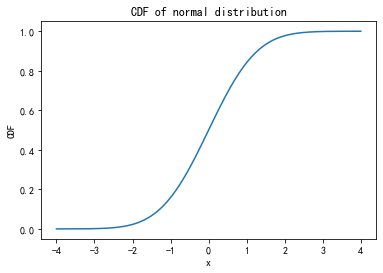

In [3]:
# Cumulative distribution function of a Random Normal variable s
import scipy.stats as st 
import numpy as np 
import matplotlib.pyplot as plt
s = np.linspace(-4, 4, 1000)

plt.plot(s,st.norm.cdf(s))
plt.xlabel("x")
plt.ylabel("CDF")
plt.title("CDF of normal distribution")